### Modeling Bureau Data

Step 5: We've modeled and reduced the original application data down to about 40 fields that produce meaningful signals, but our prediction results are pretty abysmal.  We've added in data from the credit bureaus, which will hopefully improve our prediction performance.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visuals as vs

from IPython.display import display # A
#allows the use of display() for DataFrames
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Pretty display for notebooks
%matplotlib inline

# Show all of the data in a dataframe
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
# Training Set
application_train = pd.read_csv('data/tmp/bureau_application_train_preprocessed.csv', index_col=0)
application_test = pd.read_csv('data/tmp/bureau_application_test_preprocessed.csv', index_col=0)

In [3]:
display(application_train.head())
display(application_test.head())

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP

In [4]:
application_train_SK_ID_CURR = application_train['SK_ID_CURR']
application_train_TARGET = application_train['TARGET']
application_train = application_train.drop('SK_ID_CURR',axis=1)
application_train = application_train.drop('TARGET', axis=1)
print("Loaded Training Set: {0} rows {1} cols".format(application_train.shape[0], application_train.shape[1]))

application_test_SK_ID_CURR = application_test['SK_ID_CURR']
application_test = application_test.drop('SK_ID_CURR',axis=1)
print("Loaded Training Set: {0} rows {1} cols".format(application_test.shape[0], application_train.shape[1]))

Loaded Training Set: 307511 rows 313 cols
Loaded Training Set: 48744 rows 313 cols


### Check Model Prediction Performance

In [5]:
# We're just going to use n_estimators=100 for intermediate results.  It takes about an hour.... 
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1, n_estimators=100, random_state=42)
clf.fit(application_train, application_train_TARGET)
predictions = clf.predict(application_train)
score = cross_val_score(clf, application_train, application_train_TARGET, scoring='roc_auc', n_jobs=-1)
print("Score: {0}, Number of Predictions: {1}".format(np.mean(score), sum(predictions)))

Score: 0.7485221028938575, Number of Predictions: 760


### Feature Importance

In [6]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

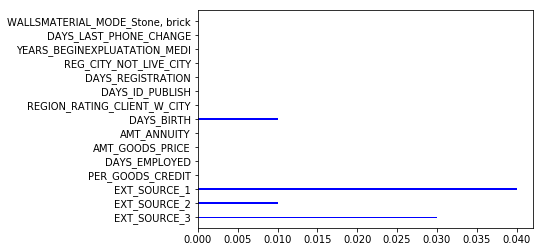

['EXT_SOURCE_3' 'EXT_SOURCE_2' 'EXT_SOURCE_1' 'PER_GOODS_CREDIT'
 'DAYS_EMPLOYED' 'AMT_GOODS_PRICE' 'AMT_ANNUITY' 'DAYS_BIRTH'
 'REGION_RATING_CLIENT_W_CITY' 'DAYS_ID_PUBLISH' 'DAYS_REGISTRATION'
 'REG_CITY_NOT_LIVE_CITY' 'YEARS_BEGINEXPLUATATION_MEDI'
 'DAYS_LAST_PHONE_CHANGE' 'WALLSMATERIAL_MODE_Stone, brick'
 'PER_CREDIT_INCOME' 'TOTALAREA_MODE' 'FLAG_DOCUMENT_13'
 'PER_ANNUITY_INCOME' 'DEF_30_CNT_SOCIAL_CIRCLE'
 'REGION_POPULATION_RELATIVE' 'OWN_CAR_AGE' 'FLAG_DOCUMENT_16'
 'FLAG_DOCUMENT_18' 'ORGANIZATION_TYPE_Transport: type 3'
 'NAME_INCOME_TYPE_State servant' 'FLAG_DOCUMENT_6'
 'ORGANIZATION_TYPE_Self-employed' 'ORGANIZATION_TYPE_Industry: type 9'
 'ORGANIZATION_TYPE_Construction' 'NAME_EDUCATION_TYPE_Higher education'
 'OCCUPATION_TYPE_Core staff' 'NAME_EDUCATION_TYPE_Incomplete higher'
 'NAME_FAMILY_STATUS_Married' 'SUM_AMT_CREDIT_SUM_LIMIT'
 'NAME_INCOME_TYPE_Commercial associate' 'SUM_BUREAU_BALANCES'
 'FLAG_DOCUMENT_3' 'SUM_CREDIT_TYPE_CODE_10' 'SUM_CREDIT_TYPE_CODE_1'
 'A

In [7]:
# Show the top 15 features
x = application_train.columns.values[indices[:15]]
y = importances[:15]                           

plt.barh(x, y, .1, color="blue")
plt.show() 

print(application_train.columns.values[indices[:50]])

### Correlations

Just sanity-checking that the features with high correlations to the TARGET value show up in the Feature Importance ranking from AdaBoost

In [8]:
application_train_w_target = pd.DataFrame()
application_train_w_target = application_train
application_train_w_target['TARGET'] = application_train_TARGET
correlations = application_train_w_target.corr()['TARGET'].sort_values()

In [20]:
print("Top 10 Negative Correlations\n{0}\n".format(correlations.head(n=20)))
print("Top 10 Positive Correlations\n{0}\n".format(correlations.tail(n=20)))

Top 10 Negative Correlations
EXT_SOURCE_2                           -0.159030
EXT_SOURCE_3                           -0.119572
DAYS_BIRTH                             -0.078239
EXT_SOURCE_1                           -0.064698
DAYS_EMPLOYED                          -0.062149
NAME_EDUCATION_TYPE_Higher education   -0.056593
DAYS_LAST_PHONE_CHANGE                 -0.055217
CODE_GENDER_F                          -0.054704
DAYS_ID_PUBLISH                        -0.051457
FLOORSMAX_AVG                          -0.049839
FLOORSMAX_MEDI                         -0.049720
FLOORSMAX_MODE                         -0.049458
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
EMERGENCYSTATE_MODE_No                 -0.042201
DAYS_REGISTRATION                      -0.041975
TOTALAREA_MODE                         -0.041037
YEARS_BEGINEXPLUATATION_MEDI           -0.040983
YEARS_BEGINEXPLUATATION_AVG            -0.040965
YEARS_BEGINEXPLUATATION_MODE           -

In [10]:
# Grab the feature names of the 10 most and least correlated features
hc_features = correlations.index
highly_correlated = list(hc_features[:10])
highly_correlated.extend(list(hc_features[-10:]))

df_hc = application_train[highly_correlated]
df_hc = df_hc.drop('TARGET',axis=1)

In [11]:
hc_corr = df_hc.corr()

#### Correlation Heatmap

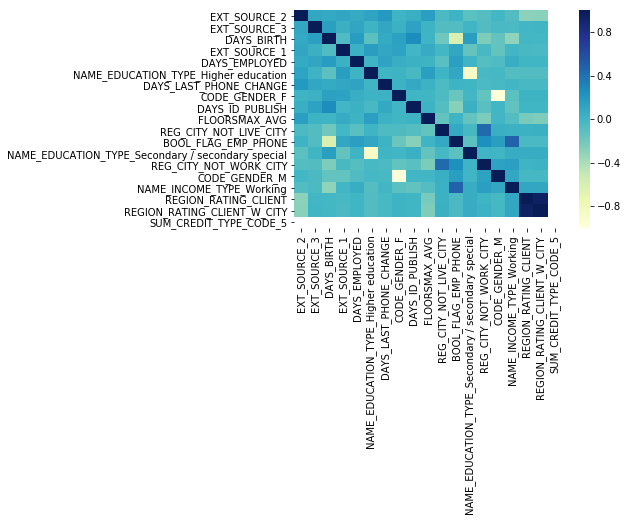

In [12]:
ax = sns.heatmap(hc_corr, cmap="YlGnBu")

#### Make Kaggle Submission

In [13]:
# HACK: I don't see where target gets added back, but it'll work for the moment....  
# I think this is another instance of df.drop() workign inconsistently.
application_train = application_train.drop('TARGET', axis=1)

# I wonder if n_estimators=1000 is actually leading us to badly overfit... 
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1, n_estimators=1000, random_state=42)
clf.fit(application_train, application_train_TARGET)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=1000, random_state=42)

In [14]:
predictions = clf.predict(application_test)

In [15]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
        
# https://stackoverflow.com/questions/209840/convert-two-lists-into-a-dictionary-in-python
features = dict(zip(application_train.columns.values[indices], importances[indices]))

display(features)

# Let's just look at everything with an importance >= 0.01
important_features = application_train.columns.values[indices][:22]

{'EXT_SOURCE_2': 0.07,
 'AMT_ANNUITY': 0.062,
 'EXT_SOURCE_3': 0.055,
 'EXT_SOURCE_1': 0.05,
 'DAYS_BIRTH': 0.049,
 'AMT_CREDIT': 0.043,
 'DAYS_EMPLOYED': 0.039,
 'PER_GOODS_CREDIT': 0.036,
 'AMT_GOODS_PRICE': 0.036,
 'DAYS_REGISTRATION': 0.03,
 'DAYS_LAST_PHONE_CHANGE': 0.027,
 'TOTALAREA_MODE': 0.016,
 'DAYS_ID_PUBLISH': 0.016,
 'SUM_DAYS_CREDIT_ENDDATE': 0.015,
 'PER_ANNUITY_INCOME': 0.014,
 'SUM_AMT_CREDIT_SUM_DEBT': 0.014,
 'SUM_AMT_CREDIT_SUM': 0.013,
 'PER_CREDIT_INCOME': 0.013,
 'AMT_INCOME_TOTAL': 0.011,
 'REGION_POPULATION_RELATIVE': 0.011,
 'SUM_DAYS_CREDIT_UPDATE': 0.011,
 'SUM_STATUS_X': 0.01,
 'LANDAREA_MODE': 0.009,
 'LANDAREA_AVG': 0.009,
 'COMMONAREA_MEDI': 0.008,
 'NONLIVINGAPARTMENTS_AVG': 0.007,
 'SUM_STATUS_0': 0.007,
 'SUM_STATUS_1': 0.007,
 'NONLIVINGAREA_AVG': 0.006,
 'LIVINGAREA_AVG': 0.006,
 'SUM_BUREAU_BALANCES': 0.005,
 'LIVINGAREA_MEDI': 0.005,
 'SUM_STATUS_2': 0.005,
 'SUM_AMT_CREDIT_MAX_OVERDUE': 0.005,
 'OWN_CAR_AGE': 0.005,
 'SUM_DAYS_ENDDATE_FACT': 0.0

In [16]:
# HACK: I don't see where target gets added back, but it'll work for the moment....  
# I think this is another instance of df.drop() workign inconsistently.

# I wonder if n_estimators=1000 is actually leading us to badly overfit... 
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1, n_estimators=1000, random_state=42)
clf.fit(application_train, application_train_TARGET)
#clf.fit(application_train[important_features], application_train_TARGET)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=1000, random_state=42)

In [17]:
predictions = clf.predict(application_test)
#predictions = clf.predict(application_test[important_features])

In [18]:
d = {'SK_ID_CURR': application_test_SK_ID_CURR, 'TARGET': predictions}
sub = pd.DataFrame(data=d)

print("Number of records flagged {0}".format(np.sum(sub['TARGET'])))

sub.to_csv('data/tmp/submission_bureau_reduced.csv', index=False)

Number of records flagged 383


#### Kaggle Score: 
- Full Dataset with Bureau Data: 0.511 - Total records flagged: 383
- Reduced Dataset with Bureau Data: - Total records flagged: 446
- Full Dataset, Outliers Removed, With Bureau Data: 
- Reduced Dataset, Outliers Removed, with Bureau Data: 


### Export

In [19]:

application_train.to_csv('data/tmp/application_bureau_train.csv')
application_test

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BOOL_FLAG_EMAIL,BOOL_FLAG_EMP_PHONE,BOOL_FLAG_OWN_CAR,BOOL_FLAG_OWN_REALTY,BOOL_FLAG_PHONE,BOOL_FLAG_WORK_PHONE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_MOBIL,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUSETYPE_MODE_not specified,HOUSETYPE_MODE_org spec account,HOUSETYPE_MODE_reg oper account,HOUSETYPE_MODE_reg oper spec account,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUP